In [1]:
# Step 1 - Load Data
import pandas as pd
dataset = pd.read_csv("/home/administrator/Downloads/DataSet/Position_Salaries.csv")
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [2]:
###########################
### Linear Regression ###
###########################
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [3]:
# Predict
lin_pred = linear_regressor.predict([[6.5]])
print('The predicted salary of a person at 6.5 Level with Linear Regression is ',lin_pred)

The predicted salary of a person at 6.5 Level with Linear Regression is  [330378.78787879]


In [4]:
################################
### Polynomial Regression ###
################################

# ** NOTE - conver X to X_poly of required degree
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=4)
X_poly = poly_features.fit_transform(X)

In [5]:
from sklearn.linear_model import LinearRegression
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
# Predict - have to convert 6.5 to poly format
poly_pred = poly_regressor.predict(poly_features.fit_transform([[6.5]]))
print('The predicted salary of a person at 6.5 Level with Polynomial Regression is ',poly_pred)


The predicted salary of a person at 6.5 Level with Polynomial Regression is  [158862.45265153]


In [7]:
################################
### SVR Regression ###
################################

# ** NOTE - SVR does not do feature scaling
from sklearn.preprocessing import StandardScaler
ss_x = StandardScaler()
ss_y = StandardScaler()
X_scaled = ss_x.fit_transform(X)
y_scaled = ss_y.fit_transform(y.reshape(-1,1))

In [8]:
from sklearn.svm import SVR
svr_regressor = SVR(kernel="rbf")
svr_regressor.fit(X_scaled, y_scaled)

/home/administrator/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [9]:
# Predict - since we did feature scaling -
# So have to scale/transform 6.5 also
position_val = ss_x.transform([[6.5]])
pred_val_scaled = svr_regressor.predict(position_val)
# The above statement will return scaled predicted value
# So have to convert that using inverse transform
svr_pred = ss_y.inverse_transform(pred_val_scaled)
print('The predicted salary of a person at 6.5 Level with Support Vector Regression is ',svr_pred)

The predicted salary of a person at 6.5 Level with Support Vector Regression is  [170370.0204065]


In [10]:
################################
### Decision Tree Regression ###
################################
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(criterion="mse")
tree_regressor.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [11]:
# Predict
tree_pred = tree_regressor.predict([[6.5]])
print('The predicted salary of a person at 6.5 Level with Decision Tree Regression is ',tree_pred)


The predicted salary of a person at 6.5 Level with Decision Tree Regression is  [150000.]


In [12]:
################################
### Random Forest Regression ###
################################
from sklearn.ensemble import RandomForestRegressor
forest_regressor = RandomForestRegressor(n_estimators=300, random_state=0)
forest_regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [13]:
# Predict
forest_pred = forest_regressor.predict([[6.5]])
print('The predicted salary of a person at 6.5 Level with Random Forest Regression is ',forest_pred)


The predicted salary of a person at 6.5 Level with Random Forest Regression is  [160333.33333333]


In [14]:
################################
### Visualizations ###
################################
import matplotlib.pyplot as plt
import numpy as np

X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid),1))

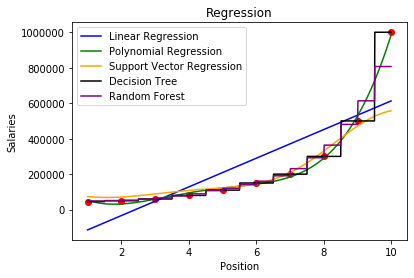

In [22]:

plt.scatter(X, y,color="red")
plt.plot(X_grid, linear_regressor.predict(X_grid), color="blue" , label="Linear Regression")
plt.plot(X_grid, poly_regressor.predict(poly_features.fit_transform(X_grid)), color="green", label="Polynomial Regression")
plt.plot(X_grid, ss_y.inverse_transform(svr_regressor.predict(ss_x.transform(X_grid))), color="orange", label="Support Vector Regression")
plt.plot(X_grid, tree_regressor.predict(X_grid), color="black" ,label="Decision Tree")
plt.plot(X_grid, forest_regressor.predict(X_grid), color="purple",label="Random Forest")
#plt.xticks(np.arange(min(X), max(X)+1, 1))
#plt.yticks(np.arange(min(y), max(y)+1, 50000))
plt.title("Regression")
plt.xlabel("Position")
plt.ylabel("Salaries")
#plt.figure(figsize=(20,10))
#fig = plt.gcf()
#fig.set_size_inches(10.5, 10)
plt.legend()    #Köşedeki kutucuğu oluşturmak için
plt.show()

In [23]:
#PREDICTIONS
#The best resolution is from SVR
print("The predicted salary of a person at 6.5 Level with Linear Regression is  [330378.78787879]")
print("The predicted salary of a person at 6.5 Level with Polynomial Regression is  [158862.45265153]")
print("The predicted salary of a person at 6.5 Level with Support Vector Regression is  [170370.0204065]")
print("The predicted salary of a person at 6.5 Level with Decision Tree Regression is  [150000.]")
print("The predicted salary of a person at 6.5 Level with Random Forest Regression is  [160333.33333333]")
      

The predicted salary of a person at 6.5 Level with Linear Regression is  [330378.78787879]
The predicted salary of a person at 6.5 Level with Polynomial Regression is  [158862.45265153]
The predicted salary of a person at 6.5 Level with Support Vector Regression is  [170370.0204065]
The predicted salary of a person at 6.5 Level with Decision Tree Regression is  [150000.]
The predicted salary of a person at 6.5 Level with Random Forest Regression is  [160333.33333333]
